# Contents Based Filtering

## 추천 시스템
사용자의 취향을 알아내 새로운 아이템을 추천하는 것  
유저가 기존에 평가한 아이템을 바탕으로 새로운 아이템에 얼만큼 관심이 있을 지를 머신러닝을 이용해 예측

### 추천 시스템 알고리즘  
Basic 알고리즘을 기반으로 변형  
가장 많이 사용되는 알고리즘으로는 Contents Based Filtering과 Collaborative Filtering(협업 필터링)이 있음  

협업 필터링은 다시 메모리 기반과 모델 기반으로 나뉘게 됨  
메모리 기반은 또 다시 User Based와 Item Based로 나뉨  

<br/>

**Recommendation System**
- Contentss Based Filtering
- Collaborative Filtering
  - Memory Based
    - User Based
    - Item Based
  - Model Based



## 유사도 함수
**유사도 정의**
- 비슷한 정도를 나타내는 지표  

아래 그림의 경우 유저 A와 유저 C는 비슷한 아이템 A, 아이템 C를 함께 선택하였으므로 유사도가 높다고 볼 수 있음

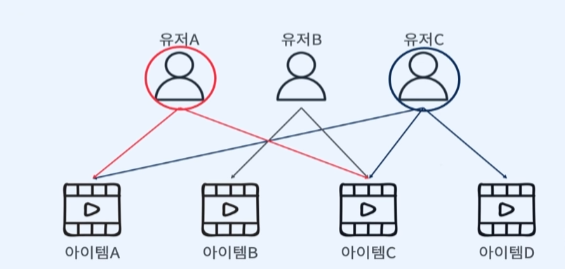

### 유사도 함수 종류
1. 유클리디안 유사도
2. 코사인 유사도
3. 피어슨 유사도
4. 자카드 유사도


#### 거리 기반 유사도 vs 각도 기반 유사도  
- 거리 기반 유사도
  - 좌표를 기준으로 가까운 위치에 있는 점들의 유사도가 높아지도록 측정  
  - 예시) 유클리디안 유사도
  - 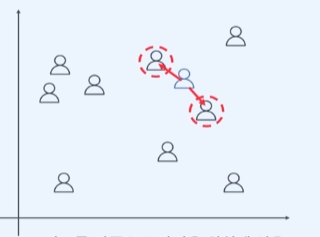
- 각도 기반 유사도
  - 좌표를 기준으로 방향이 비슷한 점들의 유사도가 높아지도록 측정  
  - 예시) 코사인 유사도, 피어슨 유사도, 자카드 유사도
  - 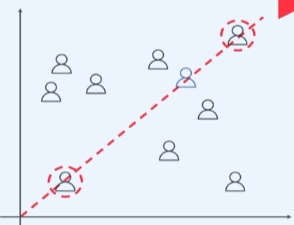

### 유클리디안 유사도
- 유클리디안 거리의 역수로 정의
  
#### 유클리디안 수식
$Euclidean Sim(A, B) = {1 \over Euclidean Distance(A, B) + 1e - 5}$  
$Euclidean Distance(A, B) = ||A-B|| = \sqrt{∑_{i=1}^n (A_i-B_i)^2}$

#### 예시를 이용한 유클리디안 유사도 계산
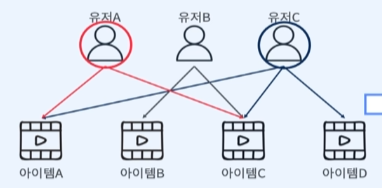

위의 유저별 각 아이템 선호 행렬은 아래와 같음  

||아이템 A|아이템 B|아이템 C|아이템 D|
|:--:|:--:|:--:|:--:|:--:|
|유저 A|1||1||
|유저 B||1|1||
|유저 C|1||1|1|

유사도 계산을 위해 결측치를 0으로 채움  

||아이템 A|아이템 B|아이템 C|아이템 D|
|:--:|:--:|:--:|:--:|:--:|
|유저 A|1|0|1|0|
|유저 B|0|1|1|0|
|유저 C|1|0|1|1|

유저 A와 유저 B의 유클리디안 거리  
$= \sqrt{(A_1-B_1)^2+(A_2-B_2)^2+(A_3-B_3)^2+(A_4-B_4)^2}$  
$= \sqrt{(1-0)^2+(0-1)^2+(1-1)^2+(0-0)^2}$  
$= \sqrt{2} = 1.414$  

유저 A와 유저 B의 유클리디안 유사도  
$= {1 \over 1.414} = 0.707$

위의 과정 대로 유클리디안 유사도를 모든 유저에 대하여 계산해보면 아래와 같은 결과를 얻을 수 있음  

||유저 A|유저 B|유저 C|
|:--:|:--:|:--:|:--:|
|유저 A|$∞$|0.707|1|
|유저 B|0.707|$∞$|0.578|
|유저 C|1|0.578|$∞$|

결과적으로 유사한 유저는 유저 A & 유저 C 임을 알 수 있음

### 코사인 유사도  
- 두 벡터 간의 코사인 각도를 이용해 계산  

#### 코사인 수식  
$Cosine Sim(A, B) = {A^TB \over ||A||||B||} = {\sum_{i=1}^nA_iB_i \over \sqrt{\sum_{i=1}^nA_i^2}\sqrt{\sum_{i=1}^nB_i^2}}$

코사인 수식은 두 a, b 벡터의 내적 값을 각 벡터의 크기로 나누어서 계산 가능  

코사인 유사도는 -1 ~ 1 사이의 값만 가질 수 있으며 두 벡터가 같은 방향을 가질 경우에는 1, 정 반대의 방향을 가질 때는 -1 값을 가지고 두 벡터가 전혀 상관 없는 수직일 때는 0 값을 가짐

아래 그림은 각각 왼쪽부터 코사인 유사도가 -1인 경우, 0인 경우, 1인 경우에 해당  
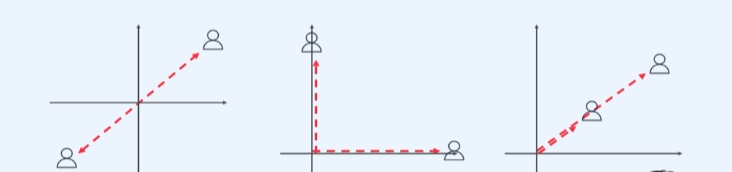


||아이템 A|아이템 B|아이템 C|아이템 D|
|:--:|:--:|:--:|:--:|:--:|
|유저 A|1|0|1|0|
|유저 B|0|1|1|0|
|유저 C|1|0|1|1|

위와 같은 경우 유저 A와 유저 B 사이의 코사인 유사도를 계산하면 아래와 같음  

$||A|| = \sqrt{1^2 + 0^2 + 1^2 + 0^2} = \sqrt{2}$  
$||B|| = \sqrt{0^2 + 1^2 + 1^2 + 0^2} = \sqrt{2}$  
$A^TB = 1* 0 + 0 * 1 + 1 * 1 + 0 * 0 = 1$

유저 A와 유저 B의 코사인 유사도  
$= {1 \over \sqrt2\sqrt2} = {1\over2}$

<br/>

**유저별 코사인 유사도**  

||유저 A|유저 B|유저 C|
|:---:|:---:|:---:|:---:|
|유저 A|1|0.5|0.816|
|유저 B|0.5|1|0.408|
|유저 C|0.816|0.408|1|  

=> 유저 A & C가 유사함



## 피어슨 유사도  
- 각도 기반 유사도  
- 두 벡터의 상관 계수로 정의  
- 유저 또는 아이템별로 가지는 특성을 제거  
  - 각 벡터에 속하는 원소들의 평균값을 제거하여 유니크한 특성을 제거  

### 피어슨 수식
$Pearson Sim(A, B) = {(A-\bar{A})^T(B-\bar{B})\over||A-\bar{A}||||B-\bar{B}||} = {\sum_{i=1}^n(A_{i}-\bar{A})(B_i-\bar{B}) \over \sqrt{\sum_{i=1}^n(A_i-\bar{A})^2}\sqrt{\sum_{i=1}^n(B_i-\bar{B})^2}}$

### 예시) 리뷰 점수

||아이템 A|아이템 B|아이템 C|아이템 D|
|:--:|:--:|:--:|:--:|:--:|
|유저 A|4|5|4|3|
|유저 B|3|4|3|2|
|유저 C|4|4|5|3|

유저 A 평균: 4  
유저 B 평균: 3  
유저 C 평균: 4

유저의 평균 점수는 유저가 부여하는 점수의 특성을 의미하므로 유저별 평균 점수를 제거한 매트릭스는 다음과 같음  

||아이템 A|아이템 B|아이템 C|아이템 D|
|:--:|:--:|:--:|:--:|:--:|
|유저 A|0|1|0|-1|
|유저 B|0|1|0|-1|
|유저 C|0|0|1|-1|  

> 코사인 유사도와의 차이를 살펴보기 위해 코사인 유사도를 먼저 구해보기  
$||A|| = \sqrt{4^2 + 5^2 + 4^2 + 3^2} = \sqrt{66}$  
$||B|| = \sqrt{3^2 + 4^2 + 3^2 + 2^2} = \sqrt{38}$  
$A^TB = 4*3 + 5*4 + 4*3 + 3*2 = 50$  
> **유저 A와 유저 B의 코사인 유사도**  
> $= {50 \over \sqrt{66}\sqrt{38}} = 0.998$  

**피어슨 유사도 계산**  
$||A - \bar{A}|| = \sqrt{0^2 + 1^2 + 0^2 + (-1)^2} = \sqrt{2}$  
$||B - \bar{B}|| = \sqrt{0^2 + 1^2 + 0^2 + (-1)^2} = \sqrt{2}$  
$(A-\bar{A})^T(B-\bar{B}) = 0 * 0 + 1 * 1 + 0 * 0 + (-1) * (-1) = 2$  

유저 A와 유저 B의 피어슨 유사도  
$ = {2 \over \sqrt{2}\sqrt{2}} = 1$

### 코사인 유사도 VS 피어슨 유사도
피어슨 유사도는 유저 특성을 제거해 점수가 편향된 경우 효과적  

#### 코사인 유사도  

||유저 A|유저 B|유저 C|
|:--:|:--:|:--:|:--:|
|유저 A|1|0.998|0.985|
|유저 B|0.998|1|0.978|
|유저 C|0.985|0.978|1|

#### 피어슨 유사도  

||유저 A|유저 B|유저 C|
|:--:|:--:|:--:|:--:|
|유저 A|1|1|0.5|
|유저 B|1|1|0.5|
|유저 C|0.5|0.5|1|

### 자카드 유사도
- 유저가 상호작용한 아이템의 합집합과 교집합의 비율로 계산  

#### 자카드 유사도 수식  
$Jaccard Sim(A, B) = {|A \cap B| \over |A \cup B|}$

### 자카드 유사도 문제점  
- 유저가 아이템에 평가한 점수의 크기가 무시됨  

**리뷰 점수**  

||아이템 A|아이템 B|아이템 C|아이템 D|아이템 E|
|:--:|:--:|:--:|:--:|:--:|:--:|
|유저 A|4|0|4|3|0|
|유저 B|3|4|0|2|0|
|유저 C|0|0|4|5|3|  

**유저별 자카드 유사도**   

||유저 A|유저 B|유저 C|
|:--:|:--:|:--:|:--:|
|유저 A|1|0.5|0.5|
|유저 B|0.5|1|0.2|
|유저 C|0.5|0.2|1|


# Contents Based Filtering
유저가 기존에 선호한 아이템과 유사한 아이템을 추천  
**아이템의 프로필**을 이용한 아이템간의 유사성 계산  

> 영화: 장르, 감독, 배우, 개봉일, 소개글, ...  
> 제품: 카테고리, 브랜드, 가격, 제품명, 사진, 상세 설명, ...

## 컨텐츠 기반 필터링 예시  
코미디 영화를 선호하는 유저가 있다면 해당 유저에게 다른 코미디 영화를 추천하는 방식  

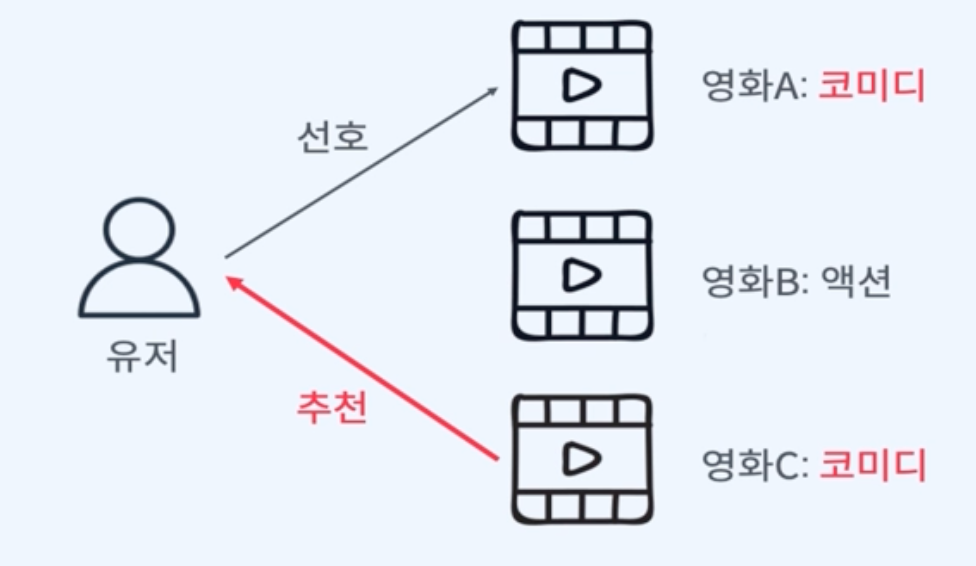

만약 도서에 대해 추천을 하려는 경우라면 각 도서들의 장르가 다 같은 경우 더 유사한 다른 아이템을 추천하기 위해 다른 기준을 추가적으로 도입해야함  

만약 각 아이템에 대한 리뷰를 이용해 유사도를 측정하고 싶다면 "재미있다", "스릴있다", "재미있게 본 소설" 등의 리뷰를 통해 유사도를 측정할 수 있어야 한다  
이 과정에서 유사한 관계임은 TF-IDF를 이용해 판별할 수 있음

## TF-IDF
- Term Frequency - Inverse Document Frequency
- 텍스트 기반 컨텐츠의 특징 벡터를 추출하는 방법  
- 출현 빈도를 이용해 특성 문서($d$) 내에서 키워드($w$)의 중요도를 측정  
- 자주 등장하는 키워드는 낮은 중요도를 부여  

### TF-IDF 수식  
$TF - IDF(w,d) = TF(w,d) × IDF(w)$  

### TF-IDF 정의
- TF: 특정 문서 내에 특정 키워드가 등장하는 빈도  
  - $TF(w,d)$ = 문서 $d$에 속한 키워드 $w$의 수  
- DF: 전체 문서 내에 특정 키워드가 등장하는 빈도  
  - DF가 큰 경우 보편적인 키워드  
- IDF: DF의 역수  
  - $IDF(w) = log({전체 문서의 수 \over 키워드 w가 포함된 문서의 수 (DF)})$

### Step 1) TF 계산
$TF(w, d) = $문서 $d$에 속한 키워드 $w$의 수  

도서 A: "소설 소설 재미 있다"  
도서 B: "소설 소설 스릴 있다"  
도서 C: "재미 있는 소설 이다"  

||재미|스릴|있-|는|소설|(이)다|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|도서 A|1|0|1|0|2|1|
|도서 B|0|1|1|0|2|1|
|도서 C|1|0|1|1|1|1|

### Step 2) IDF 계산  
$IDF(w) = log({전체 문서의 수 \over 키워드 w가 포함된 문서의 수(DF)})$  

**DF**  

|재미|스릴|있-|는|소설|(이)다|
|:-:|:-:|:-:|:-:|:-:|:-:|
|2|1|3|1|3|3|

**IDF**.

|재미|스릴|있-|는|소설|(이)다|
|:-:|:-:|:-:|:-:|:-:|:-:|
|log(3/2)|log(3)|0|log(3)|0|0|




### Step 3) TF와 IDF를 곱함  
$TF-IDF(w, d) = TF(w, d)\times IDF(w)$  

||재미|스릴|있-|는|소설|(이)다|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|도서 A|log(3/2)|0|0|0|0|0|
|도서 B|0|log(3)|0|0|0|0|
|도서 C|log(3/2)|0|0|log(3)|0|0|

### Contents Based Filtering 적용  
#### 코사인 유사도 계산  
위에서 구한 아래 매트릭스를 토대로 코사인 유사도를 계산  

||재미|스릴|있-|는|소설|(이)다|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|도서 A|log(3/2)|0|0|0|0|0|
|도서 B|0|log(3)|0|0|0|0|
|도서 C|log(3/2)|0|0|log(3)|0|0|

계산된 코사도 유사도  

||도서 A|도서 B|도서 C|
|:-:|:-:|:-:|:-:|
|도서 A|1|0|0.346|
|도서 B|0|1|0|
|도서 C|0.346|0|1|

#### TF-IDF가 필요한 이유
TF-IDF를 이용하는 이유는 단어의 중요도를 반영하기 위함임  

키워드의 개수만을 반영해 아래 매트릭스로 코사인 유사도를 구하면 아래와 같음  

||재미|스릴|있-|는|소설|(이)다|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|도서 A|1|0|1|0|2|1|
|도서 B|0|1|1|0|2|1|
|도서 C|1|0|1|1|1|1|

계산된 코사도 유사도  

||도서 A|도서 B|도서 C|
|:-:|:-:|:-:|:-:|
|도서 A|1|0.857|0.845|
|도서 B|0.857|1|0.676|
|도서 C|0.845|0.676|1|

이 경우는 재미, 스릴 등 중요 키워드가 아닌 있, 는 등의 불필요한 단어가 많이 등장했을 때 유사도가 높게 됨   
따라서 단어의 중요도를 반영하기 위해 TF-IDF를 사용